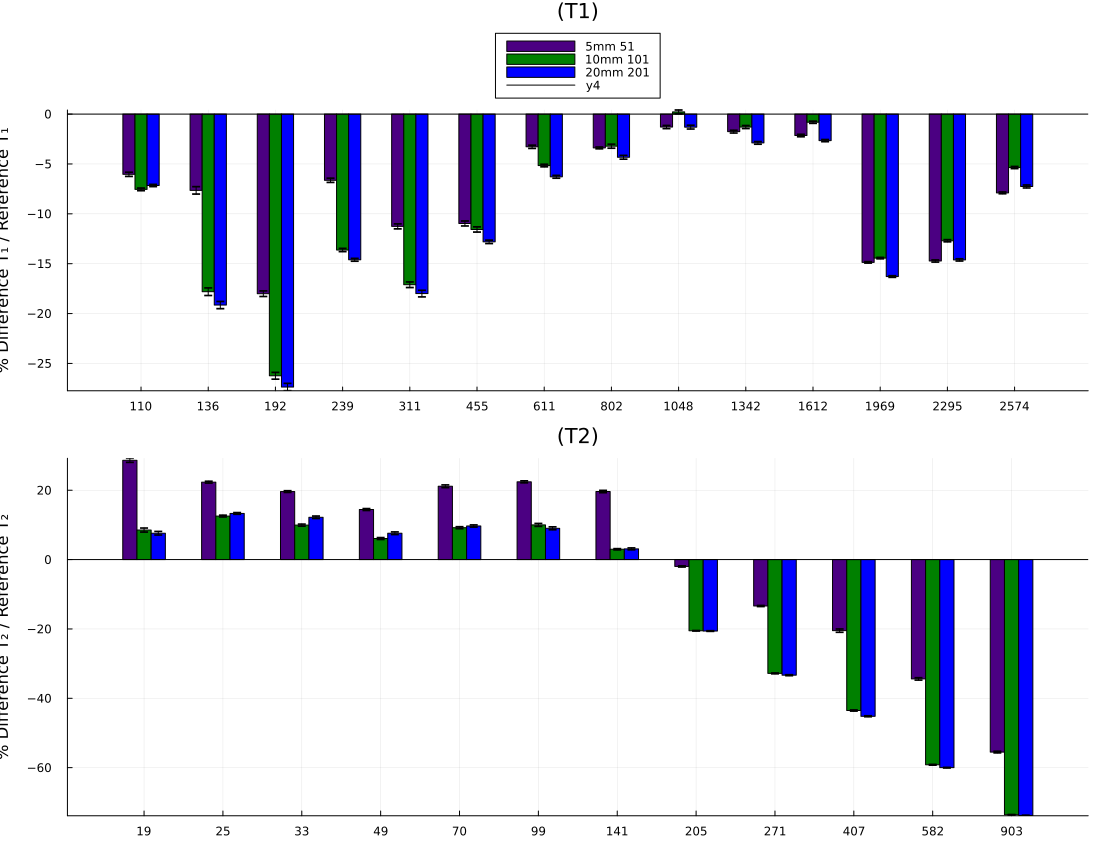

In [33]:
using Plots

reference_T1 = [2574, 2295, 1969, 1612, 1342, 1048, 802, 611, 455, 311, 239, 192, 136, 110]
reference_T2 = [903, 582, 407, 271, 205, 141, 99, 70, 49, 33, 25, 19]

methods = ["5mm 51", "10mm 101", "20mm 201"]
colors = [:indigo, :green, :blue]

t1_perc_errors = [
    -7.9 -14.73 -14.87 -2.15 -1.76 -1.30 -3.39 -3.28 -10.97 -11.26 -6.64 -18.01 -7.65 -6.04;
    -5.36 -12.7 -14.44 -0.82 -1.30 0.22 -3.22 -5.16 -11.57 -17.11 -13.63 -26.24 -17.81 -7.55;
    -7.26 -14.62 -16.29 -2.66 -2.89 -1.31 -4.33 -6.29 -12.81 -18 -14.61 -27.37 -19.15 -7.16
]
t1_error_bars = [
    0.09 0.11 0.07 0.12 0.14 0.16 0.09 0.16 0.25 0.25 0.21 0.28 0.37 0.21;
    0.11 0.11 0.07 0.11 0.15 0.19 0.20 0.13 0.26 0.28 0.16 0.34 0.38 0.13;
    0.15 0.11 0.08 0.11 0.13 0.19 0.19 0.14 0.17 0.33 0.14 0.37 0.36 0.11
]

t2_perc_errors = [
    -55.51 -34.41 -20.49 -13.38 -1.97 19.63 22.42 21.15 14.44 19.62 22.33 28.63;
    -73.58 -59.17 -43.52 -32.82 -20.52 2.98 10 9.2 6.08 9.94 12.55 8.52;
    -73.8 -60 -45.19 -33.34 -20.61 3.09 9.02 9.69 7.60 12.2 13.31 7.6
]
t2_error_bars = [
    0.23 0.34 0.48 0.16 0.17 0.33 0.28 0.39 0.27 0.25 0.27 0.59;
    0.07 0.11 0.16 0.12 0.06 0.18 0.42 0.28 0.27 0.30 0.26 0.58;
    0.07 0.08 0.14 0.14 0.09 0.27 0.42 0.31 0.38 0.35 0.25 0.52
]

function grouped_bar(ax_ref_vals, data, errors, ylab, title_txt; show_legend=false)
    n_methods, n_vials = size(data)
    bar_width = 0.18
    x = 1:n_vials
    offsets = collect(1:n_methods) .- (n_methods + 1)/2
    offsets .*= bar_width

    plt = plot(title=title_txt, ylabel=ylab,
               xticks=(x, string.(ax_ref_vals)), legend=show_legend ? :outertop : false,
               size=(950, 400))

    for i in 1:n_methods
        xpos = x .+ offsets[i]
        bar!(xpos, data[i, :], yerr=errors[i, :],
             bar_width=bar_width, label=methods[i], color=colors[i], capsize=3)
    end

    hline!([0], color=:black, linewidth=1)
    return plt
end

sort_idx_T1 = sortperm(reference_T1)
reference_T1 = reference_T1[sort_idx_T1]
t1_perc_errors = t1_perc_errors[:, sort_idx_T1]
t1_error_bars  = t1_error_bars[:, sort_idx_T1]

sort_idx_T2 = sortperm(reference_T2)
reference_T2 = reference_T2[sort_idx_T2]
t2_perc_errors = t2_perc_errors[:, sort_idx_T2]
t2_error_bars  = t2_error_bars[:, sort_idx_T2]

p1 = grouped_bar(reference_T1, t1_perc_errors, t1_error_bars,
                 "% Difference T₁ / Reference T₁", "(T1)", show_legend=true)

p2 = grouped_bar(reference_T2, t2_perc_errors, t2_error_bars,
                 "% Difference T₂ / Reference T₂", "(T2)", show_legend=false)

plot(p1, p2, layout=(2,1), size=(1100,850))